In [1]:
import pandas as pd
import numpy as np

In [2]:
train_df = pd.read_csv("./train.csv")
test_df = pd.read_csv("./test.csv")
submission = pd.read_csv("./gender_submission.csv")

In [3]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
submission

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


## 랜덤 시드 설정

In [6]:
import random
np.random.seed(1234)
random.seed(1234)

## EDA

In [7]:
print(train_df.shape)
print(test_df.shape)

(891, 12)
(418, 11)


- 데이터 내용 확인하기

In [8]:
pd.set_option("display.max_columns",50)
pd.set_option("display.max_rows",50)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


- 데이터 속성 확인하기

In [10]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

용어)  
- 질적 변수: 분류를 위한 수치로 수치 사이의 간격에 큰 의미가 없는 경우(티켓 등급)
- 양적 변수: 간격에 의미가 있는 수치(age, 요금 등)

- 데이터의 통계랑 확인하기

In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [12]:
test_df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


- 카테고리 변수 확인하기

In [13]:
train_df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [14]:
train_df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

- 결측치 확인하기

In [15]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [16]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

train, test dataset 모두 Age 및 cabin 속성에 결측치가 많다.

## Data visualiztion

In [17]:
# %matplotbin inline
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
# 표시 스타일 지정
plt.style.use('ggplot')

- 데이터 프레임에서 임의의 컬럼 추출

In [19]:
train_df[["Embarked","Survived","PassengerId"]]

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


- 결측치 제거(시각화 하고 싶은 데이터에서)

In [20]:
train_df[["Embarked","Survived","PassengerId"]].dropna()

,Embarked,Survived,PassengerId
0,S,0,1
1,C,1,2
2,S,1,3
3,S,1,4
4,S,0,5
...,...,...,...
886,S,0,887
887,S,1,888
888,S,0,889
889,C,1,890


- Embarked와 Survivied로만 집계하기

In [21]:
train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count()

PassengerId
Embarked Survived             
C        0                  75
         1                  93
Q        0                  47
         1                  30
S        0                 427
         1                 217

- 데이터를 수평으로 변환

In [22]:
embarked_df=train_df[["Embarked","Survived","PassengerId"]].dropna().groupby(["Embarked","Survived"]).count().unstack()

- 누적 막대 그래프로 시각화

<AxesSubplot:xlabel='Embarked'>

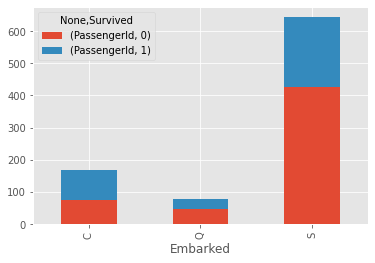

In [23]:
embarked_df.plot.bar(stacked=True)

설명)  
    승선 항구가 C -> 절반 사망  
    Q -> 절반 이상 사망  
    S -> 절반 이상 사망

- 수치로 확인하기

In [24]:
embarked_df["survived_rate"]=embarked_df.iloc[:,0] /(embarked_df.iloc[:,0])+embarked_df.iloc[:,1]

In [25]:
embarked_df

PassengerId      survived_rate
Survived           0    1              
Embarked                               
C                 75   93          94.0
Q                 47   30          31.0
S                427  217         218.0

- 성별과 티켓 시각화

<AxesSubplot:xlabel='Sex'>

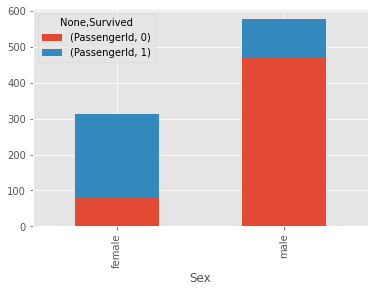

In [26]:
# 성별과 사망수 관계
sex_df = train_df[["Sex","Survived","PassengerId"]].dropna().groupby(["Sex","Survived"]).count().unstack()
sex_df.plot.bar(stacked=True)

설명)  
남성이 여성보다 많은 사망 결과를 보여준다.

<AxesSubplot:xlabel='Pclass'>

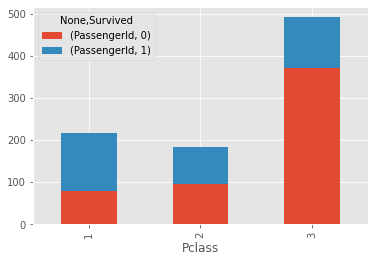

In [27]:
# 티겟 등급과 사망수 관계
ticket_df=train_df[["Pclass","Survived","PassengerId"]].dropna().groupby(["Pclass","Survived"]).count().unstack()
ticket_df.plot.bar(stacked=True)

설명)  
티켓 등급이 낮을수록 사망자 수가 많다.

- 연령별 생존율
(히스토그램 사용)

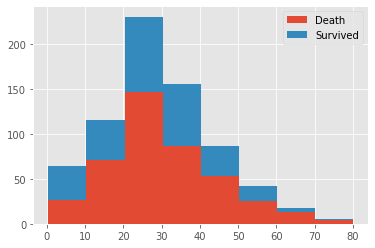

In [28]:
plt.hist(x=[train_df.Age[train_df.Survived==0], train_df.Age[train_df.Survived==1]],
        bins=8, histtype='barstacked', label=["Death","Survived"])
plt.legend()

설명)  
20, 30대에서의 인원이 많은 사망을 보였다.

- 카테고리 변수를 수치 데이터로 변환하기(원핫인코딩)  

In [29]:
# 더미 변수화
train_df_corr = pd.get_dummies(train_df, columns=["Sex"], drop_first=True)
# train_df_corr = pd.get_dummies(train_df, columns=["Embarked"])

In [30]:
train_df_corr.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,S,1


- 상관 행렬 만들기  
 -1 ~ 1의 수치로 확인

In [31]:
train_corr = train_df_corr.corr()

In [32]:
train_corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.042939
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.131900
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.093254
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.114631
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.245489
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182333
Sex_male,0.042939,-0.543351,0.131900,0.093254,-0.114631,-0.245489,-0.182333,1.000000


- 상관 행렬을 heat map으로 보여주기

<AxesSubplot:>

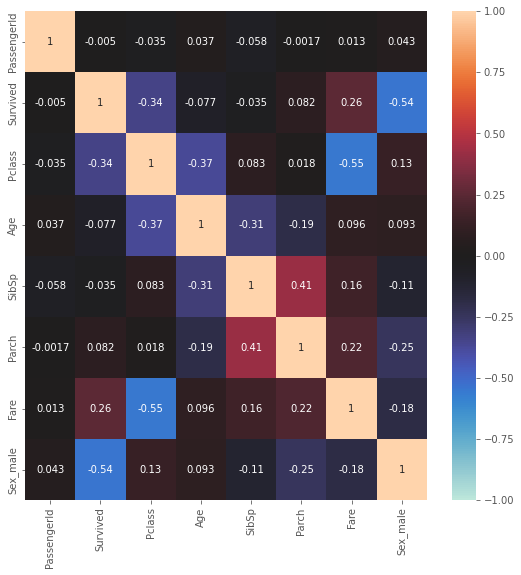

In [33]:
plt.figure(figsize=(9,9))
sns.heatmap(train_corr, vmax=1, vmin=-1, center=0, annot=True)

설명)  
survived와 높은 상관 관계를 보여주는 지표는 'sex_male'이다. (-0.54)  
이어서 높은 상관 관계는 'Pclass'이다.(-0.34)


## Data Preprocessing
Fare, Name, Parch, SibSp를 대상

In [34]:
# 학습데이터와 테스트 데이터 통합하기
all_df = pd.concat([train_df,test_df], sort=False).reset_index(drop=True)
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


- 전체 데이터의 결측치 확인

In [35]:
all_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

Survived, Age, Cabin의 결측치가 많다. 하지만 목표로 했던 'Fare'의 결측치를 평균값으로 메우겠다.

In [36]:
Fare_mean = all_df[['Pclass','Fare']].groupby("Pclass").mean().reset_index()

#컬럼명 변경
Fare_mean.columns = ["Pclass","Fare_mean"]

Fare_mean

,Pclass,Fare_mean
0,1,87.508992
1,2,21.179196
2,3,13.302889


In [37]:
# 결측치 채워 넣기
all_df = pd.merge(all_df, Fare_mean, on="Pclass", how = "left")
all_df.loc[(all_df["Fare"].isnull()),"Fare"]=all_df["Fare_mean"]
all_df = all_df.drop("Fare_mean", axis = 1)

In [38]:
# Name의 결측치 보기
all_df["Name"].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [39]:
# 호칭을 변수로 추가
name_df = all_df["Name"].str.split("[,.]",2, expand=True)
# ,나 .로 구분하면 0부터 세기 시작해서 2번째에 나오는 요소가 호칭이 된다.
name_df

,0,1,2
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [40]:
# 컬럼명 변경
name_df.columns = ["family_name","honorific","name"]

In [41]:
name_df

,family_name,honorific,name
0,Braund,Mr,Owen Harris
1,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss,Laina
3,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,Allen,Mr,William Henry
...,...,...,...
1304,Spector,Mr,Woolf
1305,Oliva y Ocana,Dona,Fermina
1306,Saether,Mr,Simon Sivertsen
1307,Ware,Mr,Frederick


In [42]:
# strip()으로 앞뒤 공백 지우기
name_df["family_name"]= name_df["family_name"].str.strip()
name_df["honorific"]= name_df["honorific"].str.strip()
name_df["name"]= name_df["name"].str.strip()

 - 호칭 별 인원수

In [43]:
name_df["honorific"].value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Major             2
Ms                2
Lady              1
Sir               1
Mme               1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Dona              1
Name: honorific, dtype: int64

- 호칭별 연령 분포 확인
all_df와 name_df을 결합한다. axis=1로써 가로로 결합한다. 

In [44]:
all_df = pd.concat([all_df, name_df], axis=1)

In [45]:
all_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,family_name,honorific,name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr,Owen Harris
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs,John Bradley (Florence Briggs Thayer)
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss,Laina
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs,Jacques Heath (Lily May Peel)
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr,William Henry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Spector,Mr,Woolf
1305,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Oliva y Ocana,Dona,Fermina
1306,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Saether,Mr,Simon Sivertsen
1307,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Ware,Mr,Frederick


- box plot

<AxesSubplot:xlabel='honorific', ylabel='Age'>

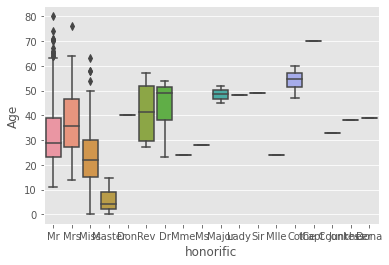

In [46]:
plt.plot(figsize=(18, 5))
sns.boxplot(x="honorific", y="Age", data= all_df)

- 호칭별 연령 평균값 확인

In [47]:
all_df[["Age","honorific"]].groupby("honorific").mean()

,Age
honorific,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


- 호칭별 생존율 차이 확인하기

In [48]:
train_df = pd.concat([train_df, name_df[0:len(train_df)].reset_index(drop=True)],axis=1)
test_df = pd.concat([test_df, name_df[len(train_df):].reset_index(drop=True)], axis=1)
                      

<AxesSubplot:xlabel='honorific'>

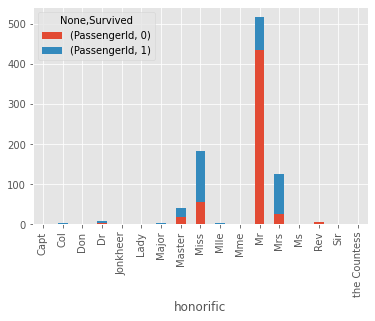

In [49]:
# 필요한 요소(honorific, Survived, PassengerId)을 뽑고 결측치를 포함한 행 삭제하고 호칭, 생존 별로 인원수 집계
honorific_df = train_df[["honorific","Survived","PassengerId"]].dropna().groupby(["honorific","Survived"]).count().unstack()
honorific_df.plot.bar(stacked=True)



설명)  
여성에게 쓰이는 호칭 'Mrs", 'Miss'와 어린 남자의 'Master'의 생존율이 높은 것을 볼 수 있다. 여성과 어린 아이들부터 피신 시켰을 것이라 볼 수 있는 부분이다.  
나이 부분에 결측치가 많았는데, 호칭을 참고함으로써 보완할 수 있는 기회가 생겼다.

- 나이 결측치를 호칭 데이터로 보완하기

In [50]:
honorific_age_mean = all_df[["honorific", "Age"]].groupby("honorific").mean().reset_index()
honorific_age_mean.columns = ["honorific","honorific_Age"]

In [51]:
all_df = pd.merge(all_df, honorific_age_mean, on="honorific",how="left")
all_df.loc[(all_df["Age"].isnull()), "Age"] = all_df["honorific_Age"]
all_df = all_df.drop(["honorific_Age"],axis=1)

- 가족 인원수 추가하기


In [52]:
all_df["family_num"] = all_df["Parch"] + all_df["SibSp"]
all_df["family_num"].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family_num, dtype: int64

- 홀로 승선했는지 여부를 새로운 변수로 추가하기


In [53]:
all_df.loc[all_df["family_num"] ==0, "alone"] = 1
all_df["alone"].fillna(0, inplace=True)

- 불필요한 변수 삭제하기  
PassengerId, Name, family_name은 불필요하다 판단하여 삭제함.


In [54]:
all_df = all_df.drop(["PassengerId","Name","family_name","name","Ticket","Cabin"],axis=1)

In [55]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


- 카데고리 변수를 수치로 변환하기  
카테고리 변수 중 문자열은 수치로 변환한다. 

In [56]:
categories = all_df.columns[all_df.dtypes == "object"]
print(categories)

Index(['Sex', 'Embarked', 'honorific'], dtype='object')


- 필요한 호칭만 쓰고 나머지 처리  

In [57]:
all_df.loc[~((all_df["honorific"] =="Mr") |
    (all_df["honorific"] =="Miss") |
    (all_df["honorific"] =="Mrs") |
    (all_df["honorific"] =="Master")), "honorific"] = "other"

In [58]:
all_df.honorific.value_counts()

Mr        757
Miss      260
Mrs       197
Master     61
other      34
Name: honorific, dtype: int64

other로 빼도 좋을만큼 영향력이 없어 보였다.

- 문자열을 수치로 변환하기(label Encoding)  
사이킷런의 LabelEncoder를 사용한다.


In [59]:
from sklearn.preprocessing import LabelEncoder

In [60]:
all_df["Embarked"].fillna("missing", inplace = True)

In [61]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,male,22.0,1,0,7.2500,S,Mr,1,0.0
1,1.0,1,female,38.0,1,0,71.2833,C,Mrs,1,0.0
2,1.0,3,female,26.0,0,0,7.9250,S,Miss,0,1.0
3,1.0,1,female,35.0,1,0,53.1000,S,Mrs,1,0.0
4,0.0,3,male,35.0,0,0,8.0500,S,Mr,0,1.0


In [62]:
for cat in categories:
    le = LabelEncoder()
    print(cat)
    if all_df[cat].dtypes == "object":    
        le = le.fit(all_df[cat])
        all_df[cat] = le.transform(all_df[cat])

Sex
Embarked
honorific


In [63]:
all_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,honorific,family_num,alone
0,0.0,3,1,22.0,1,0,7.2500,2,2,1,0.0
1,1.0,1,0,38.0,1,0,71.2833,0,3,1,0.0
2,1.0,3,0,26.0,0,0,7.9250,2,1,0,1.0
3,1.0,1,0,35.0,1,0,53.1000,2,3,1,0.0
4,0.0,3,1,35.0,0,0,8.0500,2,2,0,1.0



- 모든 데이터를 학습 데이터와 테스트 데이터로 되돌리기


In [64]:
train_X = all_df[~all_df["Survived"].isnull()].drop("Survived",axis=1).reset_index(drop=True)
train_Y = train_df["Survived"]
test_X = all_df[all_df["Survived"].isnull()].drop("Survived",axis=1).reset_index(drop=True)

## ML Modeling
LightGBM  


In [65]:
import lightgbm as lgb
print(lgb.__version__)

3.3.0


학습 데이터의 목적 변수(생존 여부)를 예측하고자 여러 가지 설명 변수(연령, 성별, 티켓 등급 등)을  
사용하여 모델을 만들고 테스트 데이터에 적용하는 것이 일반적인 머신 러닝 플로우다.  
하지만 테스트 데이터에는 목적 변수가 빠져 있으므로 테스트 데이터만으로는 얼마나 모델이 정확한지 검증할 수 없다.  

그래서 학습 데이터에서 검증 데이터를 분리하는 과정이 필요하다. 
- 홀드 아웃
- 교차 검증
- 잭나이프법  


교차 검증을 사용했다.

In [66]:
# 홀드 아웃, 교차 검증 실습을 위한 라이브러리 불러오기
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

In [67]:
X_train, X_valid, y_train, y_valid = train_test_split(train_X, train_Y, test_size=0.2)

In [68]:
# 카테고리 지정해주기
categories = ["Embarked", "Pclass", "Sex","honorific","alone"]

In [69]:
# lgb data set
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid,  categorical_feature=categories, reference=lgb_train)
# hyper parameter
lgbm_params = {
    "objective":"binary",        
    "random_seed":1234,
}

- 모델 학습시키기


In [70]:
from platform import python_version

print(python_version())


3.9.7


In [71]:
model_lgb = lgb.train(lgbm_params, 
                      lgb_train, 
                      valid_sets=lgb_eval, 
                      num_boost_round=100,
                      early_stopping_rounds=5,
                      verbose_eval=10)


[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 5 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.


- 각 변수의 중요도 가시화

In [72]:
model_lgb.feature_importance()

array([ 34,  19, 184,  20,   8, 241,  27,   3,  19,   0], dtype=int32)

<AxesSubplot:>

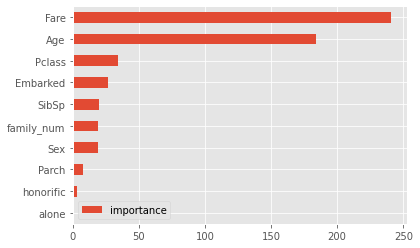

In [73]:
importance = pd.DataFrame(model_lgb.feature_importance(), index=X_train.columns, columns=["importance"]).sort_values(by="importance",ascending =True)
importance.plot.barh()

설명)  
Fare, Age, Pclass가 중요한 변수인 것을 확인했다.

- Validation Test

In [74]:
# 모델을 검증 데이터에 적용하기
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [75]:
# 예측도 출력
from sklearn.metrics import accuracy_score

accuracy_score(y_valid, np.round(y_pred))

0.8435754189944135

설명)  
검증 데이터로 0.82의 정확도가 나왔다.   
하이퍼 파라미터를 조정하며 추이를 살펴본다.

- 하이퍼 파라미터 조정

In [76]:
lgbm_params = {
    "objective":"binary",
    "max_bin":331,
    "num_leaves": 20,
    "min_data_in_leaf": 57,
    "andom_seed":1234,
}

In [77]:
lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)

In [78]:
model_lgb = lgb.train(lgbm_params, lgb_train, 
                      valid_sets=lgb_eval, 
                      num_boost_round=100,
                      early_stopping_rounds=20,
                      verbose_eval=10)

[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] Number of positive: 272, number of negative: 440
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 224
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 10
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.382022 -> initscore=-0.480973
[LightGBM] [Info] Start training from score -0.480973
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.


In [79]:
y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

In [80]:
accuracy_score(y_valid, np.round(y_pred))

0.8435754189944135

설명)   
에폭을 두 배로 늘렸다.  
accuracy가 0.83이 나온 걸 보니 조금 올랐다.

### - 교차 검증을 통한 학습

In [81]:
folds = 3
kf = KFold(n_splits=folds)

In [82]:
models = []
for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]
        
    lgb_train = lgb.Dataset(X_train, y_train, categorical_feature=categories)
    lgb_eval = lgb.Dataset(X_valid, y_valid, categorical_feature=categories, reference=lgb_train)    
    
    model_lgb = lgb.train(lgbm_params, 
                          lgb_train, 
                          valid_sets=lgb_eval, 
                          num_boost_round=100,
                          early_stopping_rounds=20,
                          verbose_eval=10,
                         )
    
    
    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)
    print(accuracy_score(y_valid, np.round(y_pred)))
    
    models.append(model_lgb)

/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:181: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
/opt/conda/lib/python3.9/site-packages/lightgbm/engine.py:240: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
/opt/conda/lib/python3.9/site-packages/lightgbm/basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.


[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] Number of positive: 236, number of negative: 358
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000103 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 206
[LightGBM] [Info] Number of data points in the train set: 594, number of used features: 10
[LightGBM] [Warning] Unknown parameter: andom_seed
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.397306 -> initscore=-0.416701
[LightGBM] [Info] Start training from score -0.416701
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
Training until validation scores don't improve for 20 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

설명)  
fold 수의 맞게 3개의 정확도를 가지 모델 3가지를 만들었다.  
0.81..., 0.81..., 0.83...

#### 테스트 데이터 예측 결과

In [83]:
preds=[]

for model in models:
    pred = model.predict(test_X)
    preds.append(pred)

In [84]:
# 세 가지 모델의 세 가지 결과를 평균을 낸다.  
preds_array = np.array(preds)
preds_mean = np.mean(preds_array, axis=0)

이 중 0.5보다 큰 경우 1(생존) 아니면 0(사망)으로 변환한다.

In [85]:
preds_int=(preds_mean>0.5).astype(int)

### Submission 파일 생성

In [86]:
submission["Survived"] = preds_int

In [87]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


- csv로 저장

In [88]:
submission.to_csv("./titanic_submit01.csv",index=False)

**위 csv파일을 캐글에 업로드하면 된다.**

## 정확도 이외의 여러 가지 분석
### 1. 추가 분석: 타이타닉에는 어떤 사람이 승선하고 있었는가?

- 티켓 등급별 인원수 확인하기

In [95]:
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
all_df = pd.concat([train_df, test_df],sort=False).reset_index(drop=True)


In [96]:
all_df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

<AxesSubplot:>

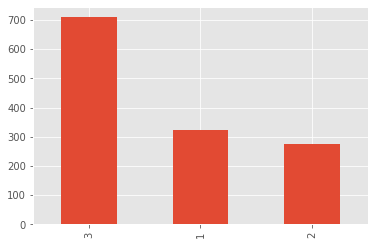

In [97]:
all_df.Pclass.value_counts().plot.bar()

설명)  

3등급 승객이 가장 많다. 

- 요금 분포 확인하기 

In [99]:
all_df[["Pclass","Fare"]].groupby("Pclass").describe()

Fare                                                                 
        count       mean        std  min      25%      50%       75%       max
Pclass                                                                        
1       323.0  87.508992  80.447178  0.0  30.6958  60.0000  107.6625  512.3292
2       277.0  21.179196  13.607122  0.0  13.0000  15.0458   26.0000   73.5000
3       708.0  13.302889  11.494358  0.0   7.7500   8.0500   15.2458   69.5500

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

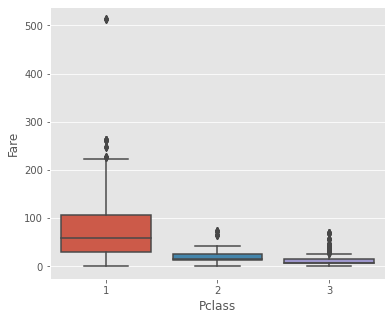

In [100]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Pclass', y='Fare', data=all_df)

설명)  
1등급 티켓은 3등급보다 무려 일곱 배 가까운 가격대를 형성하고 있다. 게다가 1등급은 가격대의 폭도 넓고 가장 비싼 티켓을 3등급 평균 요금의 50배에 달한다.

- 1등급 티켓 중 고액권(1등급 티켓 상위25%)을 Pclass0으로 만들기  

In [101]:
all_df["Pclass2"] = all_df["Pclass"]

Pclass2 중 Fare가 108보다 큰 경우 이를 0등급으로 만들겠다.  


In [102]:
#Fare가 108보다 큰 것을 0으로 변경하기
all_df.loc[all_df["Fare"]>108, "Pclass2"] =0

In [103]:
all_df[all_df["Pclass2"]==0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Pclass2
27,28,0.0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S,0
31,32,1.0,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,NaN,1,0,PC 17569,146.5208,B78,C,0
88,89,1.0,1,"Fortune, Miss. Mabel Helen",female,23.0,3,2,19950,263.0000,C23 C25 C27,S,0
118,119,0.0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C,0
195,196,1.0,1,"Lurette, Miss. Elise",female,58.0,0,0,PC 17569,146.5208,B80,C,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,1263,NaN,1,"Wilson, Miss. Helen Alice",female,31.0,0,0,16966,134.5000,E39 E41,C,0
1266,1267,NaN,1,"Bowen, Miss. Grace Scott",female,45.0,0,0,PC 17608,262.3750,NaN,C,0
1291,1292,NaN,1,"Bonnell, Miss. Caroline",female,30.0,0,0,36928,164.8667,C7,S,0
1298,1299,NaN,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0


- 티켓 등급별 연령 분포 확인하기

In [105]:
all_df[["Pclass2","Age"]].groupby("Pclass2").describe()

Age                                                     
         count       mean        std   min   25%   50%    75%   max
Pclass2                                                            
0         76.0  35.242368  15.422162  0.92  24.0  35.0  45.50  67.0
1        208.0  40.591346  13.981486  4.00  30.0  40.5  50.25  80.0
2        261.0  29.506705  13.638627  0.67  22.0  29.0  36.00  70.0
3        501.0  24.816367  11.958202  0.17  18.0  24.0  32.00  74.0

<AxesSubplot:xlabel='Pclass2', ylabel='Age'>

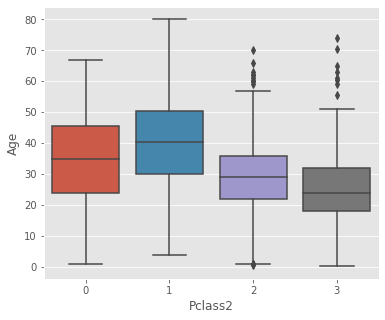

In [106]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass2", y="Age", data=all_df)

설명)  
평균 연령은 3등급에서 1등급으로 갈수록 높아지는 거 같다.

#### - 15세 이상 대상으로 분석하기


In [107]:
all_df[all_df["Age"]>15][["Pclass2","Age"]].groupby("Pclass2").describe()

Age                                                    
         count       mean        std   min   25%   50%   75%   max
Pclass2                                                           
0         69.0  37.920290  13.428357  17.0  27.0  36.0  48.0  67.0
1        207.0  40.768116  13.780416  16.0  30.0  41.0  50.5  80.0
2        233.0  32.369099  11.363367  16.0  24.0  30.0  39.0  70.0
3        422.0  28.200237   9.634512  16.0  21.0  26.0  33.0  74.0

<AxesSubplot:xlabel='Pclass2', ylabel='Age'>

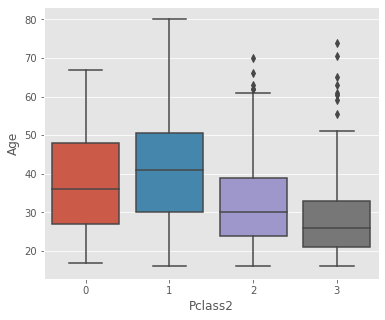

In [109]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass2", y="Age", data=all_df[all_df["Age"]>15])

설명)  
단순히 젊은 사람은 싼 티켓, 노인들이 비싼 티켓을 사지는 않는 것 같다.  
  
분포로 보자.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

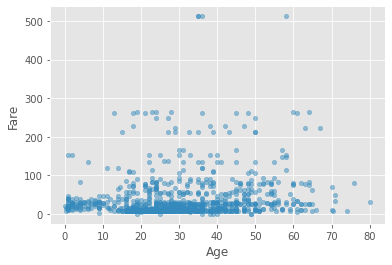

In [110]:
all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)

#### - 티켓 등급별 승선 가족 수 확인하기
티켓 등급에 따라 승선 가족 수에 차이가 있을까?

In [111]:
all_df["family_num"]=all_df["SibSp"]+all_df["Parch"]

In [112]:
all_df[["Pclass2","family_num"]].groupby("Pclass2").describe()

family_num                                              
             count      mean       std  min  25%  50%  75%   max
Pclass2                                                         
0             81.0  1.543210  1.541504  0.0  0.0  1.0  2.0   5.0
1            242.0  0.553719  0.687172  0.0  0.0  0.0  1.0   3.0
2            277.0  0.761733  1.029060  0.0  0.0  0.0  1.0   5.0
3            709.0  0.968970  1.921230  0.0  0.0  0.0  1.0  10.0

<AxesSubplot:xlabel='Pclass2', ylabel='family_num'>

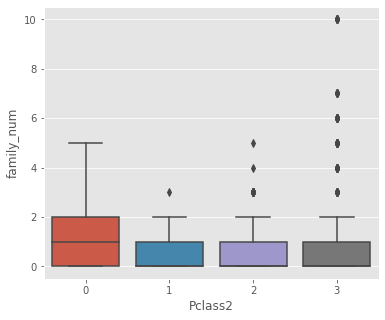

In [113]:
plt.figure(figsize=(6,5))
sns.boxplot(x="Pclass2", y="family_num", data=all_df)

1등급에서 3등급은 평균 승선 가족 수가 1을 밑도는 반면(0이면 혼자 탑승한 것)  
3등급을 보면 가족 수가 10명이 함께 승선한 경우도 볼 수 있다.  

#### - 티켓 등급별 남녀 비율 확인하기

In [114]:
Pclass_gender_df= all_df[["Pclass2","Sex",'PassengerId']].dropna().groupby(["Pclass2","Sex"]).count().unstack()

<AxesSubplot:xlabel='Pclass2'>

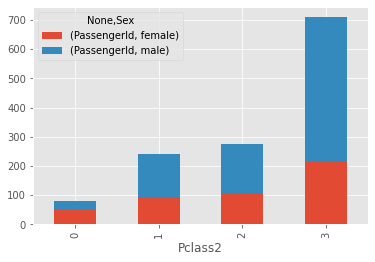

In [115]:
Pclass_gender_df.plot.bar(stacked=True)

설명)  
0등급은 여성이 많은 반면, 3등급은 다른 등급에 비해 유난히 남성 비율이 높다.

#### - 승선 항구별 차이 확인하기


In [116]:
Pclass_emb_df = all_df[["Pclass2","Embarked","PassengerId"]].dropna().groupby(["Pclass2","Embarked"]).count().unstack()

In [117]:
Pclass_emb_df = Pclass_emb_df.fillna(0)

<AxesSubplot:xlabel='Pclass2'>

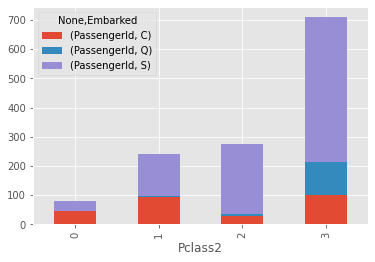

In [118]:
Pclass_emb_df.plot.bar(stacked=True)

설명)  
C=Cherbourg, Q=Queenstown, S=Southampton. 


### 클러스터링 해보기


In [120]:
#10대
C_young10 = all_df[(all_df["Embarked"]=="C") & (all_df["Age"]//10 ==1)&(all_df["family_num"]==0)]

#20대
C_young20 = all_df[(all_df["Embarked"]=="C") & (all_df["Age"]//10 ==2)&(all_df["family_num"]==0)]


In [121]:
len(C_young10)

7

In [122]:
len(C_young20)

31

#### - Cherbourg에서 탑승한 젊은 승객의 요금 분포 알아보기

<AxesSubplot:xlabel='Age', ylabel='Fare'>

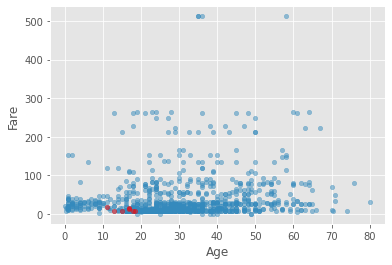

In [123]:
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young10.plot.scatter(x="Age", y="Fare", color="red", alpha=0.5, ax=ax)

10대 중 혼자 탑승한 고객의 분포이다.   

- 그 중 Cherbourg에서 승선한 승객 분포는.

<AxesSubplot:xlabel='Age', ylabel='Fare'>

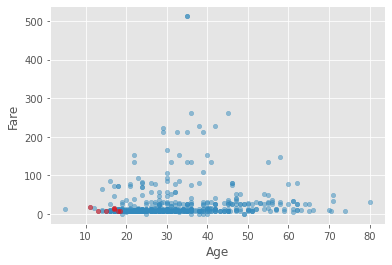

In [126]:
ax = all_df[all_df["family_num"] == 0].plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young10.plot.scatter(x="Age", y="Fare", color="red",alpha=0.5, ax=ax)

- Cherbourg에서 혼자 탄 20대 승객 분포


<AxesSubplot:xlabel='Age', ylabel='Fare'>

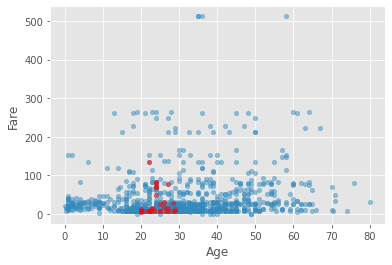

In [127]:
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young20.plot.scatter(x="Age", y="Fare", color="red",alpha=0.5, ax=ax)

<AxesSubplot:xlabel='Age', ylabel='Fare'>

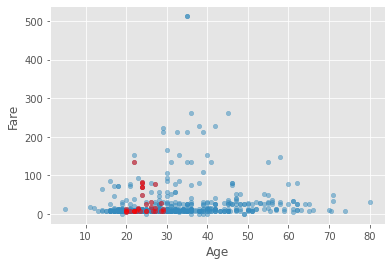

In [128]:
ax = all_df[all_df["family_num"] == 0].plot.scatter(x="Age", y="Fare", alpha=0.5)
C_young20.plot.scatter(x="Age", y="Fare", color="red",alpha=0.5, ax=ax)

- 혼자 탄 10대 승객의 항구별 요금 비교

<AxesSubplot:xlabel='Age', ylabel='Fare'>

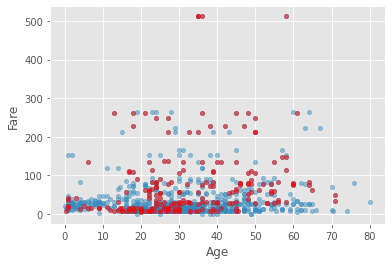

In [129]:
C_all = all_df[(all_df["Embarked"] == "C")]
ax = all_df.plot.scatter(x="Age", y="Fare", alpha=0.5)
C_all.plot.scatter(x="Age", y="Fare", color="red",alpha=0.5, ax=ax)

- 항구 별 10대 1인의 평균 요금 비교

In [130]:
all_df[(all_df["Age"] // 10 == 1) & (all_df["family_num"]== 0)][["Embarked","Fare"]].groupby("Embarked").mean()

,Fare
Embarked,
C,10.594057
Q,7.531944
S,16.218712


설명)  
Cherbourg에서 승선한 고객은 상위 클래스 티켓이 많았다.10대가 구매한 Chersbourg의 티켓이 Southampont보다 싸게 구입할 것을 볼 수 있다.